# Assignment 2 - Adaptive Linear Neuron (Adaline)
---
Muhammed Ersoy - mue@tamu.edu - [Github Repository](https://github.com/UlascanErsoy/ECEN427-TAMU)

- [Step 1 | Loading the data & Standardization](#step1)
- [Step 2 | The Adaline Algorithm](#step2)
- [Step 3 | All-pair MultiClass Classifier](#step3)
- [Step 4 | One-vs-all Classifier](#step4)

---

### Step 0 - Environment

In [203]:
from typing import Optional, List, Iterator, Dict
from collections import defaultdict
from abc import ABC, abstractmethod
from pandas.api.types import is_float_dtype
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pandas as pd
import seaborn

<h3 id="step1">Step 1 - Loading the Data & Standardization</h4>

In [204]:
df = pd.read_csv(
            "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
            header=None,
            encoding="utf-8"
        )
df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length','Petal Width','Class']

df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


- Lets see what the mean and variance are for our features.

In [205]:
for col in df.columns:
    if is_float_dtype(df[col].dtype):
        print(f"{col}:\t Mean = {df[col].mean():.2f}\t Std = {df[col].std():.2f}")

Sepal Length:	 Mean = 5.84	 Std = 0.83
Sepal Width:	 Mean = 3.05	 Std = 0.43
Petal Length:	 Mean = 3.76	 Std = 1.76
Petal Width:	 Mean = 1.20	 Std = 0.76


<Axes: xlabel='Sepal Length', ylabel='Petal Length'>

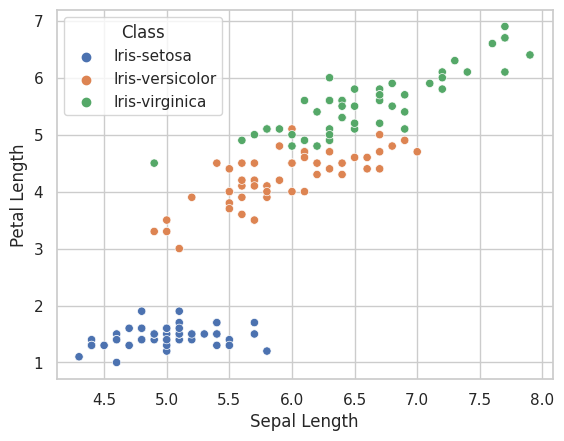

In [206]:
seaborn.set(style='whitegrid')
seaborn.scatterplot(x='Sepal Length',
                    y='Petal Length',
                    hue='Class',
                    data=df)

#### Apply Standardization

- The goal of standardization is to move the mean of all features to 0, and `standardize` their standard deviation to 1.

<div>
<svg xmlns="http://www.w3.org/2000/svg" width="12.95ex" height="4.757ex" role="img" focusable="false" viewBox="0 -1301.4 5723.9 2102.8" xmlns:xlink="http://www.w3.org/1999/xlink" aria-hidden="true" style="vertical-align: -1.813ex;"><defs><path id="MJX-61-TEX-I-1D465" d="M52 289Q59 331 106 386T222 442Q257 442 286 424T329 379Q371 442 430 442Q467 442 494 420T522 361Q522 332 508 314T481 292T458 288Q439 288 427 299T415 328Q415 374 465 391Q454 404 425 404Q412 404 406 402Q368 386 350 336Q290 115 290 78Q290 50 306 38T341 26Q378 26 414 59T463 140Q466 150 469 151T485 153H489Q504 153 504 145Q504 144 502 134Q486 77 440 33T333 -11Q263 -11 227 52Q186 -10 133 -10H127Q78 -10 57 16T35 71Q35 103 54 123T99 143Q142 143 142 101Q142 81 130 66T107 46T94 41L91 40Q91 39 97 36T113 29T132 26Q168 26 194 71Q203 87 217 139T245 247T261 313Q266 340 266 352Q266 380 251 392T217 404Q177 404 142 372T93 290Q91 281 88 280T72 278H58Q52 284 52 289Z"></path><path id="MJX-61-TEX-V-2032" d="M79 43Q73 43 52 49T30 61Q30 68 85 293T146 528Q161 560 198 560Q218 560 240 545T262 501Q262 496 260 486Q259 479 173 263T84 45T79 43Z"></path><path id="MJX-61-TEX-I-1D456" d="M184 600Q184 624 203 642T247 661Q265 661 277 649T290 619Q290 596 270 577T226 557Q211 557 198 567T184 600ZM21 287Q21 295 30 318T54 369T98 420T158 442Q197 442 223 419T250 357Q250 340 236 301T196 196T154 83Q149 61 149 51Q149 26 166 26Q175 26 185 29T208 43T235 78T260 137Q263 149 265 151T282 153Q302 153 302 143Q302 135 293 112T268 61T223 11T161 -11Q129 -11 102 10T74 74Q74 91 79 106T122 220Q160 321 166 341T173 380Q173 404 156 404H154Q124 404 99 371T61 287Q60 286 59 284T58 281T56 279T53 278T49 278T41 278H27Q21 284 21 287Z"></path><path id="MJX-61-TEX-N-3D" d="M56 347Q56 360 70 367H707Q722 359 722 347Q722 336 708 328L390 327H72Q56 332 56 347ZM56 153Q56 168 72 173H708Q722 163 722 153Q722 140 707 133H70Q56 140 56 153Z"></path><path id="MJX-61-TEX-N-2212" d="M84 237T84 250T98 270H679Q694 262 694 250T679 230H98Q84 237 84 250Z"></path><path id="MJX-61-TEX-I-1D707" d="M58 -216Q44 -216 34 -208T23 -186Q23 -176 96 116T173 414Q186 442 219 442Q231 441 239 435T249 423T251 413Q251 401 220 279T187 142Q185 131 185 107V99Q185 26 252 26Q261 26 270 27T287 31T302 38T315 45T327 55T338 65T348 77T356 88T365 100L372 110L408 253Q444 395 448 404Q461 431 491 431Q504 431 512 424T523 412T525 402L449 84Q448 79 448 68Q448 43 455 35T476 26Q485 27 496 35Q517 55 537 131Q543 151 547 152Q549 153 557 153H561Q580 153 580 144Q580 138 575 117T555 63T523 13Q510 0 491 -8Q483 -10 467 -10Q446 -10 429 -4T402 11T385 29T376 44T374 51L368 45Q362 39 350 30T324 12T288 -4T246 -11Q199 -11 153 12L129 -85Q108 -167 104 -180T92 -202Q76 -216 58 -216Z"></path><path id="MJX-61-TEX-I-1D70E" d="M184 -11Q116 -11 74 34T31 147Q31 247 104 333T274 430Q275 431 414 431H552Q553 430 555 429T559 427T562 425T565 422T567 420T569 416T570 412T571 407T572 401Q572 357 507 357Q500 357 490 357T476 358H416L421 348Q439 310 439 263Q439 153 359 71T184 -11ZM361 278Q361 358 276 358Q152 358 115 184Q114 180 114 178Q106 141 106 117Q106 67 131 47T188 26Q242 26 287 73Q316 103 334 153T356 233T361 278Z"></path></defs><g stroke="currentColor" fill="currentColor" stroke-width="0" transform="scale(1,-1)" data-darkreader-inline-fill="" data-darkreader-inline-stroke="" style="--darkreader-inline-fill: currentColor; --darkreader-inline-stroke: currentColor;"><g data-mml-node="math"><g data-mml-node="mstyle"><g data-mml-node="TeXAtom" data-mjx-texclass="ORD"><g data-mml-node="mtable"><g data-mml-node="mtr" transform="translate(0,42.4)"><g data-mml-node="mtd"><g data-mml-node="msubsup"><g data-mml-node="mi"><use data-c="1D465" xlink:href="#MJX-61-TEX-I-1D465"></use></g><g data-mml-node="TeXAtom" transform="translate(605,413) scale(0.707)" data-mjx-texclass="ORD"><g data-mml-node="msup"><g data-mml-node="mi"></g><g data-mml-node="mo" transform="translate(33,363) scale(0.707)"><use data-c="2032" xlink:href="#MJX-61-TEX-V-2032"></use></g></g></g><g data-mml-node="mi" transform="translate(605,-247) scale(0.707)"><use data-c="1D456" xlink:href="#MJX-61-TEX-I-1D456"></use></g></g><g data-mml-node="mo" transform="translate(1176.7,0)"><use data-c="3D" xlink:href="#MJX-61-TEX-N-3D"></use></g><g data-mml-node="TeXAtom" data-mjx-texclass="ORD" transform="translate(2232.5,0)"><g data-mml-node="mfrac"><g data-mml-node="mrow" transform="translate(220,676)"><g data-mml-node="msub"><g data-mml-node="mi"><use data-c="1D465" xlink:href="#MJX-61-TEX-I-1D465"></use></g><g data-mml-node="mi" transform="translate(605,-150) scale(0.707)"><use data-c="1D456" xlink:href="#MJX-61-TEX-I-1D456"></use></g></g><g data-mml-node="mo" transform="translate(1121.2,0)"><use data-c="2212" xlink:href="#MJX-61-TEX-N-2212"></use></g><g data-mml-node="msub" transform="translate(2121.4,0)"><g data-mml-node="mi"><use data-c="1D707" xlink:href="#MJX-61-TEX-I-1D707"></use></g><g data-mml-node="mi" transform="translate(636,-150) scale(0.707)"><use data-c="1D456" xlink:href="#MJX-61-TEX-I-1D456"></use></g></g></g><g data-mml-node="TeXAtom" data-mjx-texclass="ORD" transform="translate(1296.7,-686)"><g data-mml-node="msub"><g data-mml-node="mi"><use data-c="1D70E" xlink:href="#MJX-61-TEX-I-1D70E"></use></g><g data-mml-node="mi" transform="translate(604,-150) scale(0.707)"><use data-c="1D456" xlink:href="#MJX-61-TEX-I-1D456"></use></g></g></g><rect width="3251.3" height="60" x="120" y="220"></rect></g></g></g></g></g></g></g></g></g></svg>
</div>

In [207]:
for col in df.columns:
    if is_float_dtype(df[col].dtype):
        mean = df[col].mean()
        std  = df[col].std()

        df[col] = df[col]\
                    .apply(lambda x: (x - mean) / std)
        
        print(f"{col}:\t Mean = {df[col].mean():.2f}\t Std = {df[col].std():.2f}")

        

Sepal Length:	 Mean = -0.00	 Std = 1.00
Sepal Width:	 Mean = -0.00	 Std = 1.00
Petal Length:	 Mean = 0.00	 Std = 1.00
Petal Width:	 Mean = -0.00	 Std = 1.00


<Axes: xlabel='Sepal Length', ylabel='Petal Length'>

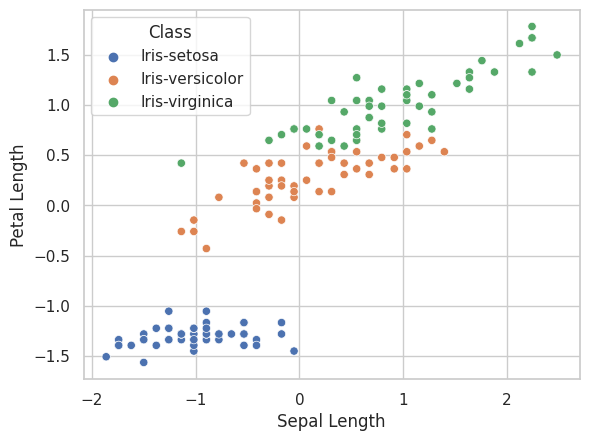

In [208]:
seaborn.set(style='whitegrid')
seaborn.scatterplot(x='Sepal Length',
                    y='Petal Length',
                    hue='Class',
                    data=df)

<h3 id="step2">Step 2 - The Adaline Algorithm</h4>

In [209]:
class Trainable(ABC):
        
        @abstractmethod
        def train(self, X: np.ndarray, 
                    y: np.ndarray,
                    seed: Optional[int] = None):
            pass

        @abstractmethod
        def predict(self, X: np.ndarray) -> np.ndarray:
            pass 
            
class Adaline(Trainable):

    def __init__(self, weights: Optional[np.ndarray] = None,
                       n: Optional[int] = 1000,
                       eta: float = 0.01):
        """Initialize and Adaline algorithm
        :param weights: initial weights 
        :type weights: ndarray | Column vector with size features + 1
        :param n: number of training iterations
        :type n: int
        :param alpha: the learning rate
        :type alpha: float , 0 < a < 1
        """
        self.weights: Optional[np.ndarray] = weights
        self.n: Optional[int] = n
        self.eta: float = eta

    def _get_iter(self) -> Iterator:
        """Returns an iterator based on epoch limit
        if the limit is set -> range(n)
        if not an infinite count is returned
        """
        return range(self.n) if self.n else itertools.count()

    def train(self, X: np.ndarray, 
                    y: np.ndarray,
                    seed: Optional[int] = None):
        """Train the weights for Adaline algorithm
        :param X: ndarray of feature vectors, bias element will
        be added automatically
        :type X: ndarray
        :param y: ndarray of result vector
        :type y: ndarray
        :param seed: seed for random number generator
        :type seed: None or int
        """
        X = np.insert(X, 0, 1, axis=1) # bias element

        if self.weights is None:
            rng = np.random.RandomState(seed=seed)
            self.weights = rng.normal(
                loc=0.0,
                scale=0.01,
                size=X.shape[1]
            )

        self.losses = []

        for _ in self._get_iter():
            pred = np.dot(X, self.weights)
            error= pred - y
            self.weights -= self.eta * 2 * X.T.dot(error) / X.shape[0]
            self.losses.append(np.square(error).mean())

    
    def predict(self, X: np.ndarray, hardpred=True) -> np.ndarray:
        """Make predictions based on internal weights
        :param X: the input vector (either the full sample set, 
        or a single sample)
        :type X: np.ndarray
        :param hardpred: Hard Prediction or soft?
        :type hardpred: bool
        :returns: prediction vector
        :rtype: ndarray
        """
        if X[0].shape != self.weights.shape:
            X = np.insert(X, 0, 1, axis=1)
        
        
        return (np.where(np.dot(X, self.weights) >= 0.5, 1, 0)
                if hardpred else
                np.dot(X, self.weights))
    
    def draw_decision_boundary(self,
                                X: np.ndarray,
                                r: float = 0.02,
                                fill: bool = True):
        """Draw the decision boundary
        requires matplotlib
        :param X: feature vector
        :type X: np.ndarray
        :param r: resolution of the grid
        :type r: float
        """
        #define the corner points for a rectangle that
        #encapsulates our (2d) feature plane
        x1_min , x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min , x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

        #generate points on this plane 
        #that splits the plane into a grid
        xx1, xx2 = np.meshgrid(
            np.arange(x1_min, x1_max, r),
            np.arange(x2_min, x2_max, r)
        )

        #generate predictions for everypoint in this grid
        #using the trained model
        pred = self.predict(
            np.array([xx1.ravel(), xx2.ravel()]).T
        )

        pred = pred.reshape(xx1.shape)
        
        colors = ['red','blue']
        if pred[0][0] == 0:
            colors = colors[::-1]
            
        cmap = ListedColormap(colors)
        if fill:
            plt.contourf(xx1, xx2, pred, alpha=0.3, cmap=cmap)
        else:
            plt.contour(xx1, xx2, pred, alpha=0.3, cmap=cmap)



In [210]:
def prepare_data(df: pd.DataFrame, 
                 features: List[str],
                 class_row: str = "Class") -> (np.ndarray, np.ndarray):
    """Prepare the dataframe into input and target arrays
    :param df: pandas dataframe containing feature and target vectors
    :type df: DataFrame
    :param features: row names of features as a list
    :type features: List of strings
    :param class_row: Row name of target vector
    :type class_row: str (default = "Class")
    :returns: X , y
    :rtype: np.ndarray , np.ndarray
    """
    id_map = {name: idx 
                for idx, name in enumerate(set(df[class_row]))
                }
    
    y = df[class_row]\
            .apply(lambda x: id_map[x])\
            .to_numpy()
    
    X = df[features].to_numpy()

    return X , y

<Axes: xlabel='Epochs (c)', ylabel='Emperical Risk'>

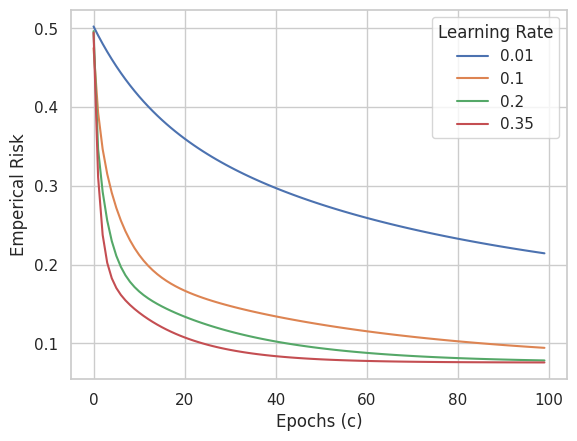

In [211]:
#use the model
features = ['Sepal Length','Petal Length']

clean_df = df[df['Class'].isin(['Iris-virginica','Iris-versicolor'])]
X , y = prepare_data(clean_df, features)

etas = [0.01, 0.1,0.2,0.35]
all_losses = []
for eta in etas:
    model = Adaline(n=100,eta=eta)
    model.train(X, y)
    all_losses.append(
        pd.DataFrame(
        {
            "Learning Rate":str(eta),
            "Emperical Risk":model.losses
        }
        )
    )
seaborn.lineplot(
    data=pd.concat(all_losses).reset_index(names=['Epochs (c)']),
    hue="Learning Rate",
    x="Epochs (c)",
    y="Emperical Risk"
)



Based on this graph the `0.01` learning rate is clearly too small and unable to converge in 100 epochs. `0.1` converges quite well although `0.2` performs slightly better the benefits quickly diminish after `0.2`

Success Rate: 94.00%


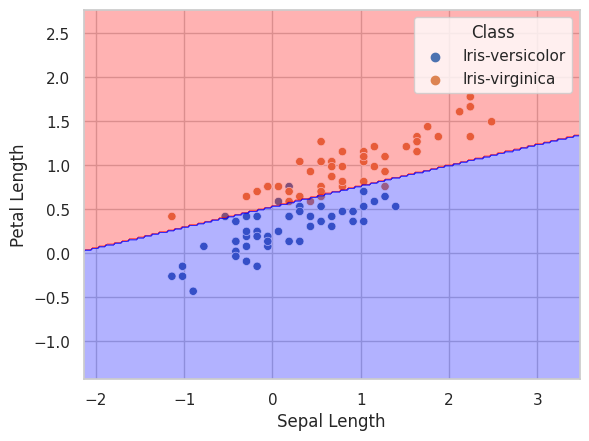

In [212]:
predict = model.predict(X)

splt = seaborn.scatterplot(x='Sepal Length',
                    y='Petal Length',
                    hue='Class',
                    data=clean_df)
error_rate = 100 * (len(y) - np.equal(predict,y).sum())/len(y)
print(f"Success Rate: {100 - error_rate:.2f}%")
model.draw_decision_boundary(X)

<h3 id="step3">Step 3 - All-pair Multiclass Classifier</h4>

In [213]:
class AllPairClassifier(Trainable):

    def __init__(self, model_class: Trainable,
                        **kwargs):
        """Train multiple binary classifiers 
        in an all pair scheme
        :param model_class: Model class to be used in the training
        :type model_class: Trainable
        :Keyword Arguments:
            Are passed to the model_class init function
        """
        self._model_class: Trainable = model_class
        self._model_kwargs: dict = kwargs
        self._models: Dict[tuple, Trainable] = dict()
        self._classes: int = 0

    @staticmethod
    def _count_votes(lst: list):
        """ 
        """
        d = defaultdict(lambda: 0)
        for item in lst:
            d[item] += 1
        
        return max(d, key=d.get)
        
    def train(self, X: np.ndarray, 
                    y: np.ndarray,
                    seed: Optional[int] = None):
        """
        Trains m * (m-1) / 2 models for every distinct pair
        of classes
        :param X: the array of features
        :type X: np.ndarray
        :param y: target vector
        :type y: np.ndarray
        :param seed: seed for random weight vector (passed to underlying model)
        :type seed: Optional[int]
        """
        pairs: List[tuple] = list(itertools.combinations(set(y), 2))

        for (val1, val2) in pairs:
            suby = y[(y == val1) | (y == val2)]
            suby = np.where(suby == max(suby), 1, 0)
            subX = X[(y == val1) | (y == val2)]
            model = self._model_class(**self._model_kwargs)
            model.train(subX, suby)

            self._models[(val1,val2)] = model
            
    def predict(self, X: np.ndarray) -> np.ndarray:
        """Make predictions based on internal weights
        :param X: the input vector (either the full sample set, 
        or a single sample)
        :type X:
        :returns: prediction vector
        :rtype: ndarray
        """
        results = []
        for (key1, key2), model in self._models.items():
            pred = model.predict(X)
            results.append(
                np.where(pred == 1, max(key1,key2), min(key1,key2))
            )

        #aggregate the votes
        return np.array(
                [self._count_votes(result) for result in np.array(results).T]
        )
            
    def draw_decision_boundary(self,
                                X: np.ndarray,
                                r: float = 0.02):
        """Draw the decision boundary
        requires matplotlib
        :param X: feature vector
        :type X: np.ndarray
        :param r: resolution of the grid
        :type r: float
        """
        #define the corner points for a rectangle that
        #encapsulates our (2d) feature plane
        x1_min , x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min , x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

        #generate points on this plane 
        #that splits the plane into a grid
        xx1, xx2 = np.meshgrid(
            np.arange(x1_min, x1_max, r),
            np.arange(x2_min, x2_max, r)
        )

        #generate predictions for everypoint in this grid
        #using the trained model
        pred = self.predict(
            np.array([xx1.ravel(), xx2.ravel()]).T
        )

        pred = pred.reshape(xx1.shape)
        
        colors = ['blue','green','red']
            
        cmap = ListedColormap(colors)
        plt.contourf(xx1, xx2, pred, alpha=0.3, cmap=cmap)
        
        

Error Rate: 4.00%


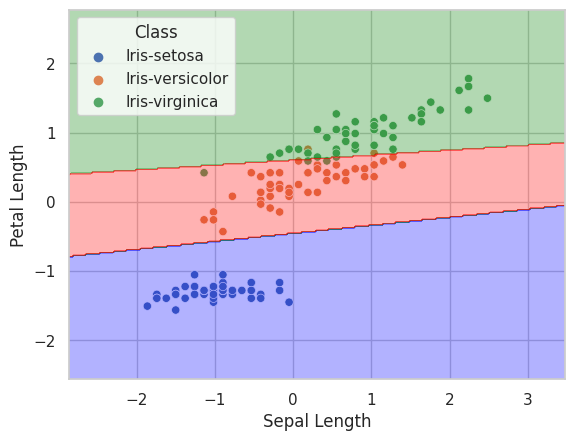

In [214]:
multi_model = AllPairClassifier(
    model_class=Adaline,
    n=100,
    eta=0.1
)
X, y = prepare_data(df, features)
multi_model.train(X, y)

splt = seaborn.scatterplot(x='Sepal Length',
                    y='Petal Length',
                    hue='Class',
                    data=df)
multi_model.draw_decision_boundary(X)
predict = multi_model.predict(X)
error_rate = 100 * (len(y) - np.equal(predict,y).sum())/len(y)
print(f"Error Rate: {error_rate:.2f}%")

<h3 id="step4">Step 4 - One-vs-all Classifier</h4>

In [215]:
class OvaClassifier(Trainable):

    def __init__(self, model_class: Trainable,
                        **kwargs):
        """Train multiple binary classifiers 
        in an all pair scheme
        :param model_class: Model class to be used in the training
        :type model_class: Trainable
        :Keyword Arguments:
            Are passed to the model_class init function
        """
        self._model_class: Trainable = model_class
        self._model_kwargs: dict = kwargs
        self._models: Dict[tuple, Trainable] = dict()
        
    def train(self, X: np.ndarray, 
                    y: np.ndarray,
                    seed: Optional[int] = None):
        """
        Trains m * (m-1) / 2 models for every distinct pair
        of classes
        :param X: the array of features
        :type X: np.ndarray
        :param y: target vector
        :type y: np.ndarray
        :param seed: seed for random weight vector (passed to underlying model)
        :type seed: Optional[int]
        """
        for key in set(y):
            
            suby = np.where(y == key, 1, 0)
            model = self._model_class(**self._model_kwargs)
            model.train(X, suby)
            self._models[key] = model
            
    def predict(self, X: np.ndarray) -> np.ndarray:
        """Make predictions based on internal weights
        :param X: the input vector (either the full sample set, 
        or a single sample)
        :type X:
        :returns: prediction vector
        :rtype: ndarray
        """
        results = []
        for _ , model in self._models.items():
            results.append(model.predict(X,hardpred=False))

        return np.array([np.where(result == max(result))[0][0] 
                         for result in np.array(results).T])
            
    def draw_decision_boundary(self,
                                X: np.ndarray,
                                r: float = 0.02):
        """Draw the decision boundary
        requires matplotlib
        :param X: feature vector
        :type X: np.ndarray
        :param r: resolution of the grid
        :type r: float
        """
        #define the corner points for a rectangle that
        #encapsulates our (2d) feature plane
        x1_min , x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min , x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

        #generate points on this plane 
        #that splits the plane into a grid
        xx1, xx2 = np.meshgrid(
            np.arange(x1_min, x1_max, r),
            np.arange(x2_min, x2_max, r)
        )

        #generate predictions for everypoint in this grid
        #using the trained model
        pred = self.predict(
            np.array([xx1.ravel(), xx2.ravel()]).T
        )

        pred = pred.reshape(xx1.shape)
        
        colors = ['blue','green','red']
            
        cmap = ListedColormap(colors)
        plt.contourf(xx1, xx2, pred, alpha=0.3, cmap=cmap)

    def draw_each_decision_boundary(self, X: np.ndarray, r: float = 0.02):
        """Draw individual decision boundaries for the 
        underlying models
        """
        for model in self._models.values():
            model.draw_decision_boundary(X, fill=False)

Error Rate: 20.67%


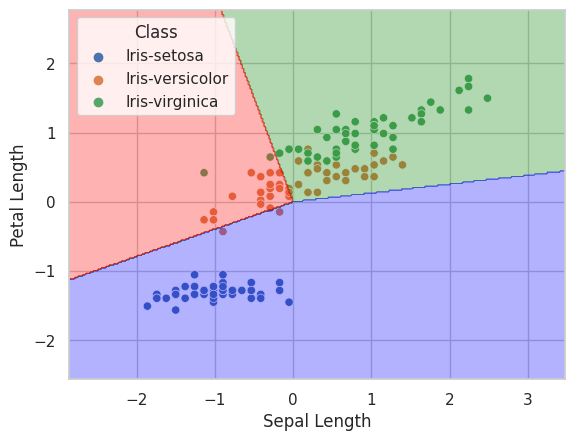

In [216]:
multi_model = OvaClassifier(
    model_class=Adaline,
    n=100,
    eta=0.1
)
X, y = prepare_data(df, features)
multi_model.train(X, y)

splt = seaborn.scatterplot(x='Sepal Length',
                    y='Petal Length',
                    hue='Class',
                    data=df)
multi_model.draw_decision_boundary(X)
predict = multi_model.predict(X)

error_rate = 100 * (len(y) - np.equal(predict,y).sum())/len(y)
print(f"Error Rate: {error_rate:.2f}%")

`One-vs-all` clearly performed worse than the `all-pairs` multiclass classifier. All-pair yielded a <b>4%</b> error rate while the `One-vs-all` method had a <b>~20%</b> error rate.

This is mainly due to the fact that the `One-vs-All` classifier can produce decision boundary of a specific shape.

The reason for this is easier to see if we draw the each boundary line separately.

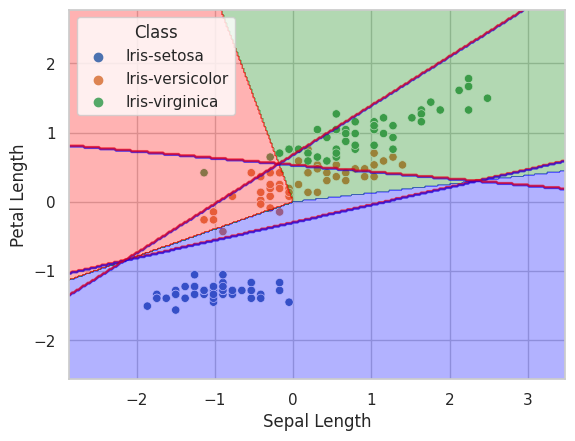

In [217]:
splt = seaborn.scatterplot(x='Sepal Length',
                    y='Petal Length',
                    hue='Class',
                    data=df)
multi_model.draw_each_decision_boundary(X)
multi_model.draw_decision_boundary(X)

The thick <b style='color:purple'>purple lines</b> are the individual decision boundaries of the 3 Adaline models we trained. Our aggregated decision boundary is formed by the points where these 3 lines meet. The median of this triangle is the mean of point of our features.

Since this shape is predicated upon us by the `argmax` function we are using to provide the hard prediction. The `One-vs-all` classifier is not a good fit for our dateset.